# Import Packages

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Plot Raw vs. Stationary Series (to display effect of transforming the raw indicator series)

Stock index (S&P500)

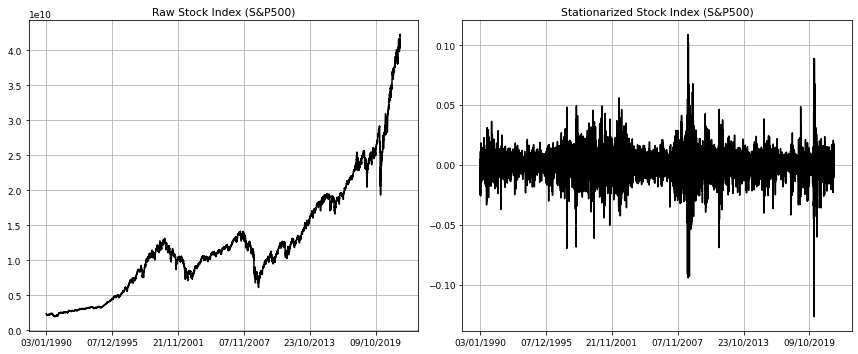

In [42]:
raw_data = pd.read_csv('Raw Stock Index.csv')
raw_data = raw_data.iloc[1:, :]
stationary_data = pd.read_csv('Stationary S&P500.csv')

column_0 = 'DATE'
plt.rcParams.update({'font.size': 9})
fig, axis = plt.subplots(1, 2, figsize=(12, 5))

axis[0].plot(raw_data[column_0], raw_data['Value'], color='black')
axis[0].set_title('Raw Stock Index (S&P500)')
axis[0].grid(True)
axis[0].xaxis.set_major_locator(MaxNLocator(nbins=6))  
axis[1].plot(stationary_data[column_0], stationary_data['S&P500'], color='black')
axis[1].set_title('Stationarized Stock Index (S&P500)')
axis[1].grid(True)
axis[1].xaxis.set_major_locator(MaxNLocator(nbins=6))  

plt.tight_layout()
plt.savefig('Stock Index Stats Plot.jpg', format='jpeg', dpi=300)
plt.show()

DGS2 (2-year T-Bill)

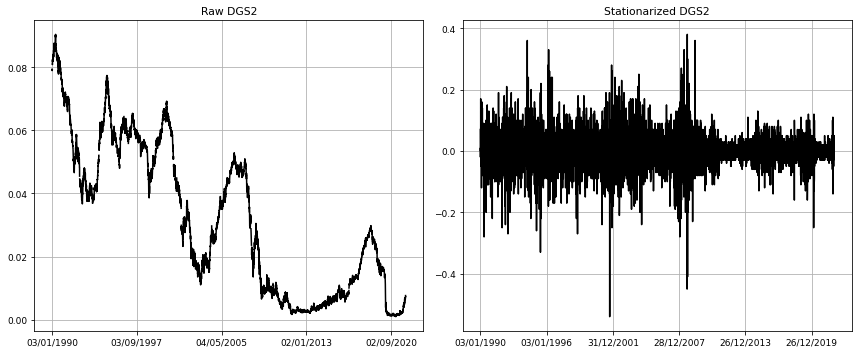

In [48]:
raw_data = pd.read_csv('Raw DGS2.csv')
raw_data = raw_data.iloc[1:, :]
stationary_data = pd.read_csv('Stationary DGS2.csv')

column_0 = 'DATE'
plt.rcParams.update({'font.size': 9})
fig, axis = plt.subplots(1, 2, figsize=(12, 5))

axis[0].plot(raw_data[column_0], raw_data['Value'], color='black')
axis[0].set_title('Raw DGS2')
axis[0].grid(True)
axis[0].xaxis.set_major_locator(MaxNLocator(nbins=6))  
axis[1].plot(stationary_data[column_0], stationary_data['DGS2'], color='black')
axis[1].set_title('Stationarized DGS2')
axis[1].grid(True)
axis[1].xaxis.set_major_locator(MaxNLocator(nbins=6))  

plt.tight_layout()
plt.savefig('DGS2 Plot.jpg', format='jpeg', dpi=300)
plt.show()

DEXUSUK (USD to GBP exchange rate)

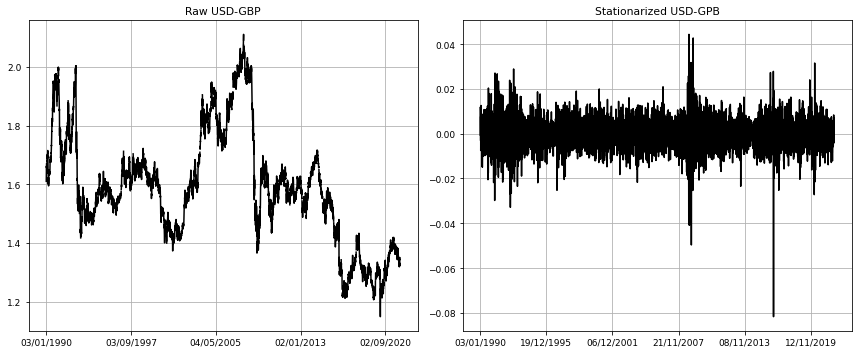

In [6]:
raw_data = pd.read_csv('Raw USD-GBP.csv')
raw_data = raw_data.iloc[1:, :]
stationary_data = pd.read_csv('Stationary USD-GBP.csv')

column_0 = 'DATE'

plt.rcParams.update({'font.size': 9})

fig, axis = plt.subplots(1, 2, figsize=(12, 5))

axis[0].plot(raw_data[column_0], raw_data['Value'], color='black')
axis[0].set_title('Raw USD-GBP')
axis[0].grid(True)
axis[0].xaxis.set_major_locator(MaxNLocator(nbins=6))  
axis[1].plot(stationary_data[column_0], stationary_data['USD-GBP'], color='black')
axis[1].set_title('Stationarized USD-GPB')
axis[1].grid(True)
axis[1].xaxis.set_major_locator(MaxNLocator(nbins=6)) 

plt.tight_layout()
plt.savefig('USD-GBP Plot.jpg', format='jpeg', dpi=300)
plt.show()

# Plot cumm. portfolio returns

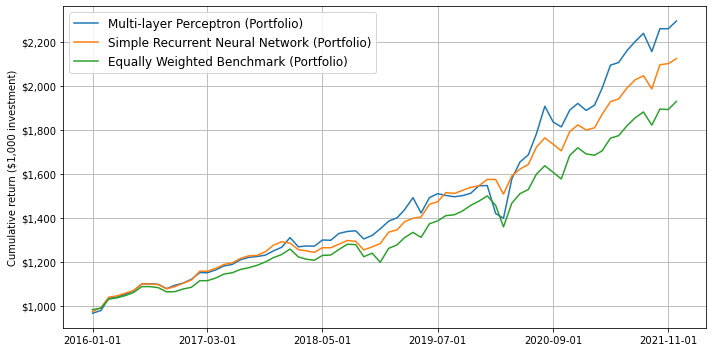

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv("Cummulative returns.csv")

dates = pd.to_datetime(df.iloc[1:, 0])
MLP = df.iloc[1:, 1]
SRNN = df.iloc[1:, 2]
EWP = df.iloc[1:, 3]
#sixfour = df.iloc[1:, 4]

# Function to format y-axis labels as dollars
def dollars_formatter(x, _):
    return f"${x:,.0f}"

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(dates, MLP, label="Multi-layer Perceptron (Portfolio)")
ax.plot(dates, SRNN, label="Simple Recurrent Neural Network (Portfolio)")
ax.plot(dates, EWP, label="Equally Weighted Benchmark (Portfolio)")
#ax.plot(dates, sixfour, label="60/40 Portfolio (benchmark 2)")

ax.set_ylabel('Cumulative return ($1,000 investment)')
ax.yaxis.set_major_formatter(FuncFormatter(dollars_formatter))  # Apply the custom formatter
ax.legend(fontsize='large')
ax.grid(True)
ax.set_xticks(dates[::int(len(dates)/5)])
plt.tight_layout()
plt.savefig('Cumm returns.jpg', format='jpeg', dpi=300)
plt.show()


# Plot error distrbution (MLP vs. SRNN)

/tmp/ipykernel_91121/4267037557.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linewidth" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Error_distributions.jpg', format='jpg', dpi=300, bbox_inches='tight', edgecolor='black', linewidth=5)


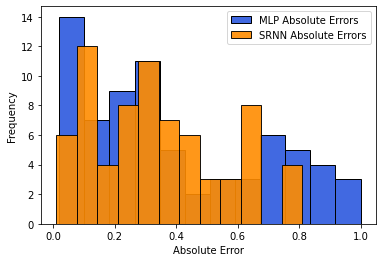

0.2982176776367995
0.2110013665413476


In [3]:
from matplotlib import rcParams
import statistics as stats

df = pd.read_excel("Individual errors.xlsx")
mlp_error = df.iloc[1:, -2]
srnn_error = df.iloc[1:, -1]

plt.hist([mlp_error], bins=12, color='royalblue', edgecolor='black', label=['MLP Absolute Errors'], alpha=1)
plt.hist([srnn_error], bins=12, color='darkorange', edgecolor='black', label=['SRNN Absolute Errors'], alpha=0.9)
plt.xlabel('Absolute Error', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend()
plt.savefig('Error_distributions.jpg', format='jpg', dpi=300, bbox_inches='tight', edgecolor='black', linewidth=5)
plt.show()
print(stats.stdev(mlp_error))
print(stats.stdev(srnn_error))